In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

620

In [7]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

import requests

from config import weather_api_key

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | chatham
Processing Record 2 of Set 1 | bluff
Processing Record 3 of Set 1 | saint george
Processing Record 4 of Set 1 | cape town
Processing Record 5 of Set 1 | rikitea
Processing Record 6 of Set 1 | pevek
Processing Record 7 of Set 1 | qaanaaq
Processing Record 8 of Set 1 | puerto ayora
Processing Record 9 of Set 1 | benguela
Processing Record 10 of Set 1 | jamestown
Processing Record 11 of Set 1 | hermanus
Processing Record 12 of Set 1 | valle del guamuez
Processing Record 13 of Set 1 | butaritari
Processing Record 14 of Set 1 | tuburan
Processing Record 15 of Set 1 | hami
Processing Record 16 of Set 1 | hilo
Processing Record 17 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 18 of Set 1 | cuxhaven
Processing Record 19 of Set 1 | west bay
Processing Record 20 of Set 1 | mataura
Processing Record 21 of Set 1 | bethel
Processing Record 22 of Set 1 | sabang
Processing Record 23

Processing Record 42 of Set 4 | myskhako
Processing Record 43 of Set 4 | churapcha
Processing Record 44 of Set 4 | sidi ali
Processing Record 45 of Set 4 | portland
Processing Record 46 of Set 4 | north bend
Processing Record 47 of Set 4 | magdagachi
Processing Record 48 of Set 4 | barawe
City not found. Skipping...
Processing Record 49 of Set 4 | misratah
Processing Record 50 of Set 4 | maykain
City not found. Skipping...
Processing Record 1 of Set 5 | ostrovnoy
Processing Record 2 of Set 5 | attawapiskat
City not found. Skipping...
Processing Record 3 of Set 5 | sao jose da coroa grande
Processing Record 4 of Set 5 | yuncheng
Processing Record 5 of Set 5 | rockport
Processing Record 6 of Set 5 | kirakira
Processing Record 7 of Set 5 | aklavik
Processing Record 8 of Set 5 | chagda
City not found. Skipping...
Processing Record 9 of Set 5 | vestmannaeyjar
Processing Record 10 of Set 5 | lloydminster
Processing Record 11 of Set 5 | kuching
Processing Record 12 of Set 5 | otane
Processing

Processing Record 33 of Set 8 | kattivakkam
Processing Record 34 of Set 8 | lincoln
Processing Record 35 of Set 8 | tucuman
Processing Record 36 of Set 8 | katete
Processing Record 37 of Set 8 | ilembo
Processing Record 38 of Set 8 | awbari
Processing Record 39 of Set 8 | sao filipe
Processing Record 40 of Set 8 | grindavik
Processing Record 41 of Set 8 | rafsanjan
Processing Record 42 of Set 8 | biograd na moru
Processing Record 43 of Set 8 | louisbourg
City not found. Skipping...
Processing Record 44 of Set 8 | nyrob
Processing Record 45 of Set 8 | ayutla
Processing Record 46 of Set 8 | lata
Processing Record 47 of Set 8 | bud
Processing Record 48 of Set 8 | springdale
Processing Record 49 of Set 8 | ossora
Processing Record 50 of Set 8 | andevoranto
City not found. Skipping...
Processing Record 1 of Set 9 | nerang
Processing Record 2 of Set 9 | ambon
Processing Record 3 of Set 9 | sao joao da barra
Processing Record 4 of Set 9 | calvinia
Processing Record 5 of Set 9 | pangai
Process

Processing Record 25 of Set 12 | murowana goslina
Processing Record 26 of Set 12 | ancud
Processing Record 27 of Set 12 | koungheul
Processing Record 28 of Set 12 | sestri levante
Processing Record 29 of Set 12 | spartanburg
Processing Record 30 of Set 12 | viedma
Processing Record 31 of Set 12 | ayoquezco
City not found. Skipping...
Processing Record 32 of Set 12 | yarim
Processing Record 33 of Set 12 | gizo
Processing Record 34 of Set 12 | adrar
Processing Record 35 of Set 12 | kaeo
Processing Record 36 of Set 12 | anadyr
Processing Record 37 of Set 12 | svetlaya
Processing Record 38 of Set 12 | antofagasta
Processing Record 39 of Set 12 | afgoye
City not found. Skipping...
Processing Record 40 of Set 12 | ayorou
Processing Record 41 of Set 12 | empalme
Processing Record 42 of Set 12 | warqla
City not found. Skipping...
Processing Record 43 of Set 12 | kupino
Processing Record 44 of Set 12 | morgan city
Processing Record 45 of Set 12 | homer
Processing Record 46 of Set 12 | lodja
Pro

In [10]:
len(city_data)

576

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Chatham,51.3789,0.5279,39.25,73,100,7.00,GB,2022-03-31 01:17:16
1,Bluff,-46.6000,168.3333,61.77,81,100,4.65,NZ,2022-03-31 01:17:16
2,Saint George,37.1041,-113.5841,70.63,27,0,12.66,US,2022-03-31 01:12:31
3,Cape Town,-33.9258,18.4232,61.12,87,100,5.68,ZA,2022-03-31 01:14:10
4,Rikitea,-23.1203,-134.9692,77.79,78,100,17.47,PF,2022-03-31 01:17:16
5,Pevek,69.7008,170.3133,-9.76,92,69,1.61,RU,2022-03-31 01:17:17
6,Qaanaaq,77.4840,-69.3632,13.17,74,97,7.00,GL,2022-03-31 01:17:17
7,Puerto Ayora,-0.7393,-90.3518,78.55,95,100,4.43,EC,2022-03-31 01:17:17
8,Benguela,-12.5763,13.4055,77.79,85,100,3.29,AO,2022-03-31 01:17:18
9,Jamestown,42.0970,-79.2353,53.19,34,0,17.27,US,2022-03-31 01:15:23


In [12]:
new_column_order = ["City", "Country","Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [13]:
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Chatham,GB,2022-03-31 01:17:16,51.3789,0.5279,39.25,73,100,7.00
1,Bluff,NZ,2022-03-31 01:17:16,-46.6000,168.3333,61.77,81,100,4.65
2,Saint George,US,2022-03-31 01:12:31,37.1041,-113.5841,70.63,27,0,12.66
3,Cape Town,ZA,2022-03-31 01:14:10,-33.9258,18.4232,61.12,87,100,5.68
4,Rikitea,PF,2022-03-31 01:17:16,-23.1203,-134.9692,77.79,78,100,17.47


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

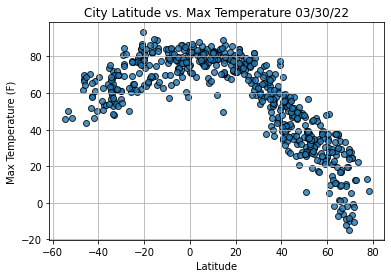

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

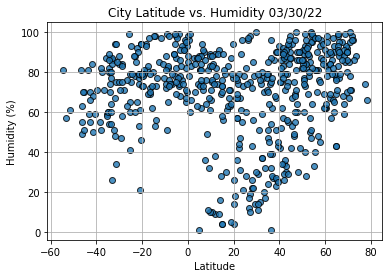

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

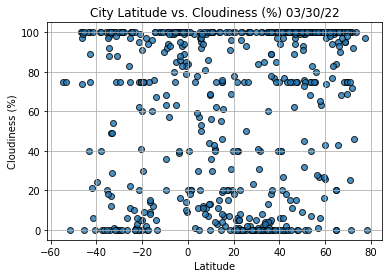

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

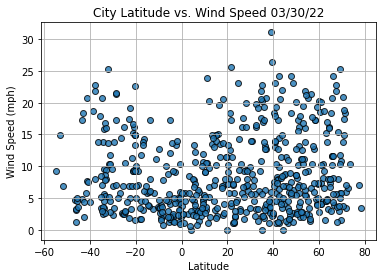

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [22]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [24]:
index13 = city_data_df.loc[13]
index13


City                      Tuburan
Country                        PH
Date          2022-03-31 01:17:19
Lat                        6.6439
Lng                      122.2736
Max Temp                    82.94
Humidity                       71
Cloudiness                     12
Wind Speed                   2.84
Name: 13, dtype: object

In [25]:
city_data_df["Lat"] >= 0

0       True
1      False
2       True
3      False
4      False
       ...  
571     True
572     True
573     True
574     True
575    False
Name: Lat, Length: 576, dtype: bool

In [26]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Chatham,GB,2022-03-31 01:17:16,51.3789,0.5279,39.25,73,100,7.00
2,Saint George,US,2022-03-31 01:12:31,37.1041,-113.5841,70.63,27,0,12.66
5,Pevek,RU,2022-03-31 01:17:17,69.7008,170.3133,-9.76,92,69,1.61
6,Qaanaaq,GL,2022-03-31 01:17:17,77.4840,-69.3632,13.17,74,97,7.00
9,Jamestown,US,2022-03-31 01:15:23,42.0970,-79.2353,53.19,34,0,17.27


In [27]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

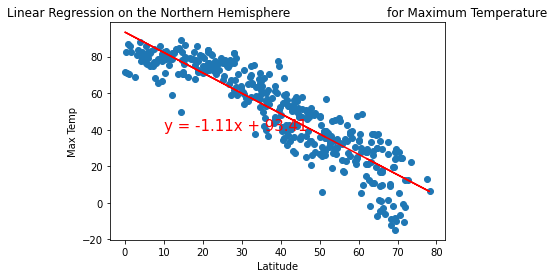

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

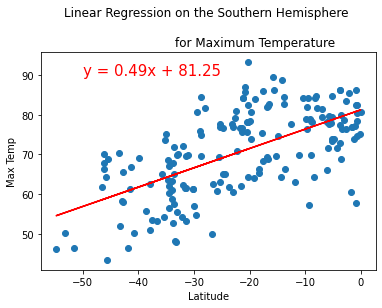

In [36]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       '''Linear Regression on the Southern Hemisphere \n
                        for Maximum Temperature''', 'Max Temp',(-50,90))

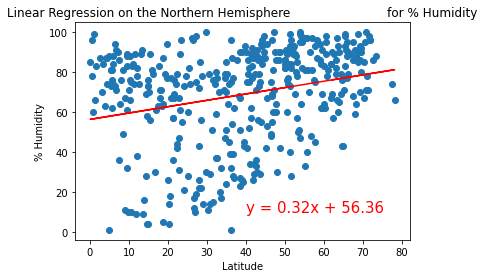

In [37]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

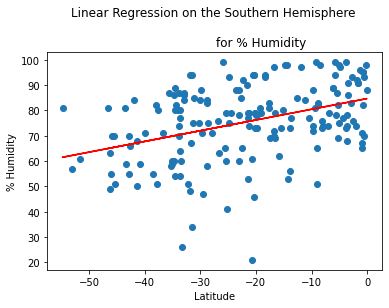

In [39]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       '''Linear Regression on the Southern Hemisphere \n
                        for % Humidity''', '% Humidity',(-50,15))

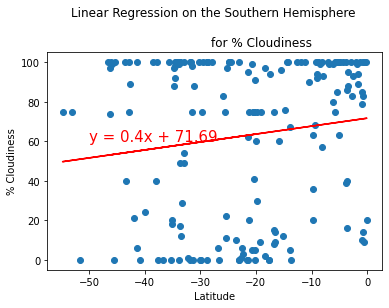

In [41]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       '''Linear Regression on the Southern Hemisphere \n
                        for % Cloudiness''', '% Cloudiness',(-50,60))

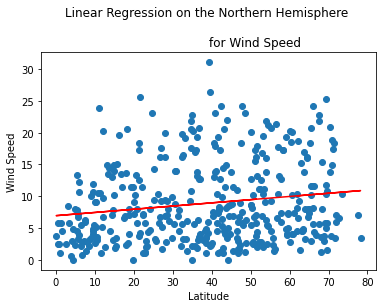

In [42]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       '''Linear Regression on the Northern Hemisphere \n
                        for Wind Speed''', 'Wind Speed',(40,35))

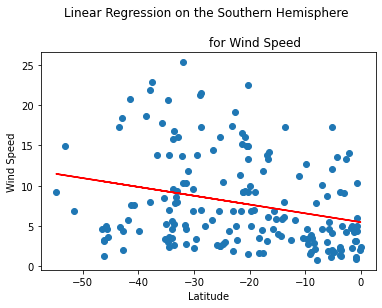

In [43]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       '''Linear Regression on the Southern Hemisphere \n
                        for Wind Speed''', 'Wind Speed',(-50,35))